In [2]:
import matplotlib.pyplot as plt
import pymongo
from sshtunnel import SSHTunnelForwarder
import numpy as np

In [3]:
MONGO_HOST = 'TUD-tm2'
MONGO_DB = 'scalable-simulations'
PKEY = '~/.ssh/id_rsa'
print("Trying to connect to mongoDB '{}'".format(MONGO_DB))
server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_pkey=PKEY,
    remote_bind_address=('127.0.0.1', 27017)
    )
server.start()
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client[MONGO_DB]


Trying to connect to mongoDB 'scalable-simulations'


In [25]:
memory_memory_means = []
memory_memory_stds = []
memory_nomemory_means = []
memory_nomemory_stds = []
nomemory_memory_means = []
nomemory_memory_stds = []
nomemory_nomemory_means = []
nomemory_nomemory_stds = []

# NODE 12

values = []
memory_memory_ids = [4084, 4085, 4107]
for id in memory_memory_ids:
    values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
memory_memory_means = np.mean(values, axis=0)
memory_memory_stds = np.std(values, axis=0)/np.sqrt(len(values))

memory_nomemory_ids = [4086, 4087, 4089]
values = []
for id in memory_nomemory_ids:
    values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
memory_nomemory_means = np.mean(values, axis=0)
memory_nomemory_stds = np.std(values, axis=0)/np.sqrt(len(values))



nomemory_memory_ids = [4081, 4079, 4080]
values = []
for id in nomemory_memory_ids:
    values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
nomemory_memory_means = np.mean(values, axis=0)
nomemory_memory_stds = np.std(values, axis=0)/np.sqrt(len(values))

nomemory_nomemory_ids = [4082, 4083, 4090]
values = []
for id in nomemory_nomemory_ids:
    values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])

steps = db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['steps']
nomemory_nomemory_means = np.mean(values, axis=0)
nomemory_nomemory_stds = np.std(values, axis=0)/np.sqrt(len(values))

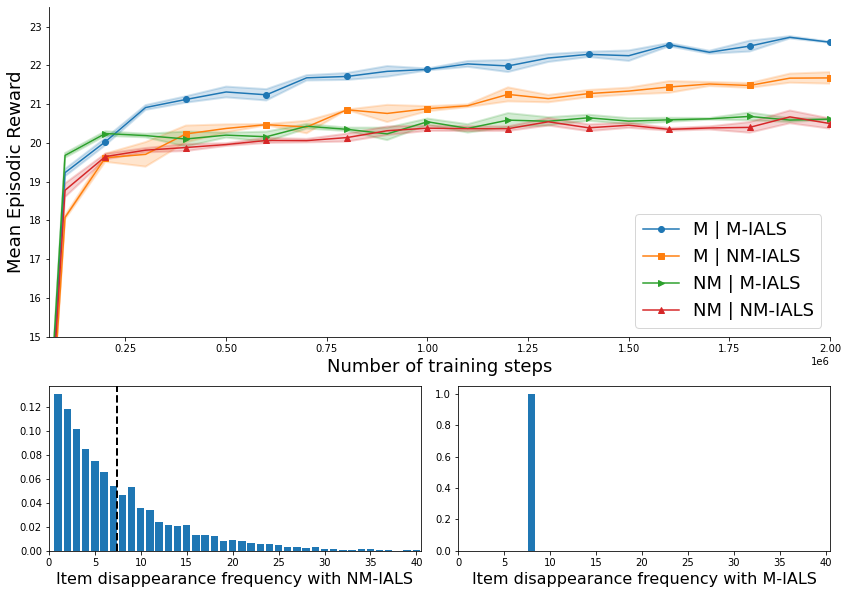

In [26]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.2, height_ratios=(2,1))
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])


length = len(memory_memory_means)
means = memory_memory_means
# steps = np.array(steps2)[np.append(np.arange(0, length,10),-1)]
stds = memory_memory_stds
ax1.plot(steps, means, color='C0', marker='o', markevery=2, label='M | M-IALS')
ax1.fill_between(steps, means - stds, means + stds, alpha=0.2, color='C0', linewidth=2)

means = memory_nomemory_means
stds = memory_nomemory_stds
ax1.plot(steps, means, color='C1', marker='s', markevery=2, label='M | NM-IALS')
ax1.fill_between(steps, means - stds, means + stds, alpha=0.2, color='C1', linewidth=2)

means = nomemory_memory_means
stds = nomemory_memory_stds
ax1.plot(steps, means, color='C2', marker='>', markevery=2, label='NM | M-IALS')
ax1.fill_between(steps, means - stds, means + stds, alpha=0.2, color='C2', linewidth=2)

means = nomemory_nomemory_means
stds = nomemory_nomemory_stds
ax1.plot(steps, means, color='C3', marker='^', markevery=2, label='NM | NM-IALS')
ax1.fill_between(steps, means - stds, means + stds, alpha=0.2, color='C3', linewidth=2)

ax1.set_xlim(6e+4,2.0e+6)
ax1.set_ylim(15,23.5)
ax1.legend(fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# plt.spines['left'].set_visible(False)
ax1.set_xlabel('Number of training steps', fontsize=18)
ax1.set_ylabel('Mean Episodic Reward', fontsize=18)

# NO MEMORY HISTOGRAM
data = np.genfromtxt('data_NM.csv', delimiter=',').astype(int)

labels, counts = np.unique(data, return_counts=True)
ax2.bar(labels, counts/len(data), align='center')
ax2.set_xlim(0,40.5)
ax2.set_xlabel('Item disappearance frequency with NM-IALS', fontsize=16)
ax2.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)

# MEMORY HISTOGRAM
data = np.genfromtxt('data.csv', delimiter=',').astype(int)

labels, counts = np.unique(data, return_counts=True)
ax3.bar(labels, counts/len(data), align='center')
ax3.set_xlim(0,40.5)
ax3.set_xlabel('Item disappearance frequency with M-IALS', fontsize=16)
plt.savefig('history_dependence.pdf')